<a href="https://colab.research.google.com/github/sfeldmanMIG25/MANE4962_Classwork/blob/main/Feldman_Stephen_ML_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1: "Use the Iris dataset and the SVM code shown in the first class. Define two new features using the original 4 features and then calculate the accuracy score of the classification. The SVM classifier must use the new features and none of the original features for classification."

Accuracy Score: 0.7333333333333333


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np

# Load Iris dataset
data = load_iris()
X = data.data  # Original features (4 features)
y = data.target  # Target labels

# Step 1: Define two new features
# Feature 1: Sum of first two features
feature_1 = X[:, 0] + X[:, 1]

# Feature 2: Difference between third and fourth features
feature_2 = X[:, 2] - X[:, 3]

# Step 2: Create a new feature set using only the two new features
X_new = np.column_stack((feature_1, feature_2))

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.40, random_state=123, shuffle=True, stratify=y)

# Step 4: Train an SVM classifier using the new features
clf = svm.SVC()
clf.fit(X_train, y_train)

# Step 5: Make predictions on the test set
preds = clf.predict(X_test)

# Step 6: Calculate the accuracy score
acc = accuracy_score(y_test, preds)
print('Accuracy score with new features:', acc)



Accuracy score with new features: 0.7333333333333333


Problem 2: "Classify only the even numbered handwritten digits using MNIST digits dataset
 with a k-nearest neighbors classifier. The classifier must not see any odd numbered digit
 images as inputs. The classifier must also consider every pixel in the input image to
 make its classification decision. Can we use pairplot to visualize this data?. Plot the the
 classification results using a heatmap showing digits which were correctly classified and
 digits which were not correctly classified. How many 6’s in your test set were correctly
 classified?"

 2052 6s were classified correctly. Heatmap is shown below. A pairplot to visualize this data is not a good use of computational resources as a pairplot is every pair of features against each other which is over 300,000 scatter plots. These cannot be interpretted by a human in a reasonable time frame.

Accuracy: 0.9887
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2071
           2       0.99      0.98      0.99      2097
           4       0.99      0.99      0.99      2047
           6       0.99      0.99      0.99      2063
           8       0.99      0.97      0.98      2048

    accuracy                           0.99     10326
   macro avg       0.99      0.99      0.99     10326
weighted avg       0.99      0.99      0.99     10326



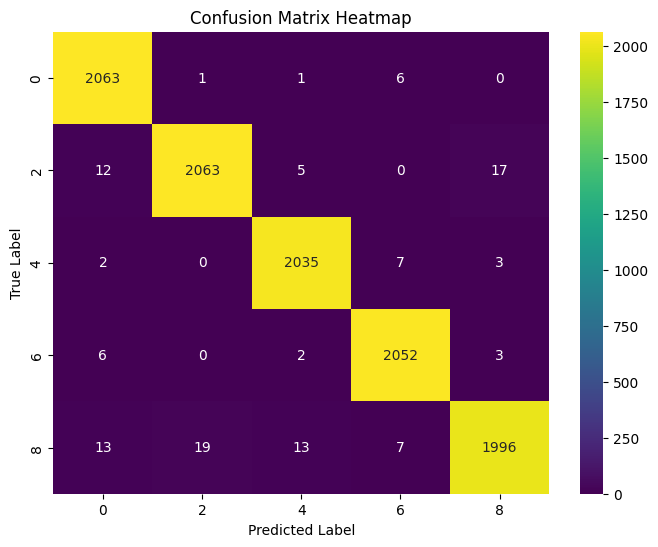

Number of correctly classified 6's: 2052


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist

# Load MNIST dataset
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# Flatten the images for compatibility with KNN
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1)
X_test_full = X_test_full.reshape(X_test_full.shape[0], -1)

# Combine train and test sets for filtering even digits
X_full = np.vstack([X_train_full, X_test_full])
y_full = np.hstack([y_train_full, y_test_full])

# Filter even-numbered digits only
mask = y_full % 2 == 0
X_even, y_even = X_full[mask], y_full[mask]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_even, y_even, test_size=0.3, random_state=42, stratify=y_even
)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the performance
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Heatmap of classification results
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Count correctly classified 6's
num_correct_sixes = cm[6 // 2, 6 // 2]  # Row and column corresponding to digit 6
print(f"Number of correctly classified 6's: {num_correct_sixes}")



Problem 3: "Cluster the Iris species by writing your own k-means algorithm using THREE features (Or modify the algorithm we used in class). Show visualization of the datausing a THREE dimensional scatter plot. Compare the clustering performance of your k-means algorithm to the sklearn implementation by making plots of the clusters from your method and Scikit’s implementation by showing the clusters from your methods and from Scikit’s method. What happens when you vary the number of clusters?

The performance is measured by the adjusted rand index or (ARI). With 2 clusters the algorithims performs identically. Evidenced by the very high score of 1.0. The score remains high but not 1.00 for k=3. This is in common with the 3D plot where it is clear visually that the algorithims chose different starting points and there is some distinction between the selection for points nearer to the center of the graph. In theory the model should perform best here as there are 3 species, however, as the features become less linearly sepperable k-means tends to struggle. This pattern continues with k=4 where the score drops to the 0.8 threshold and the differences are clearly visible in the graph. In this case, overfitting is occuring and it makes sense that k-means begins to suffer based on the starting point and other factors as it artifially tries to create an additional group where one does not exist.  

Number of clusters: 2


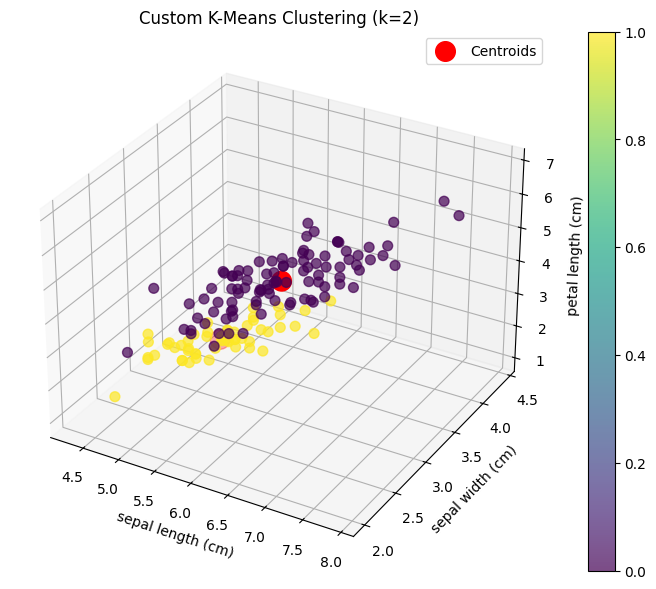

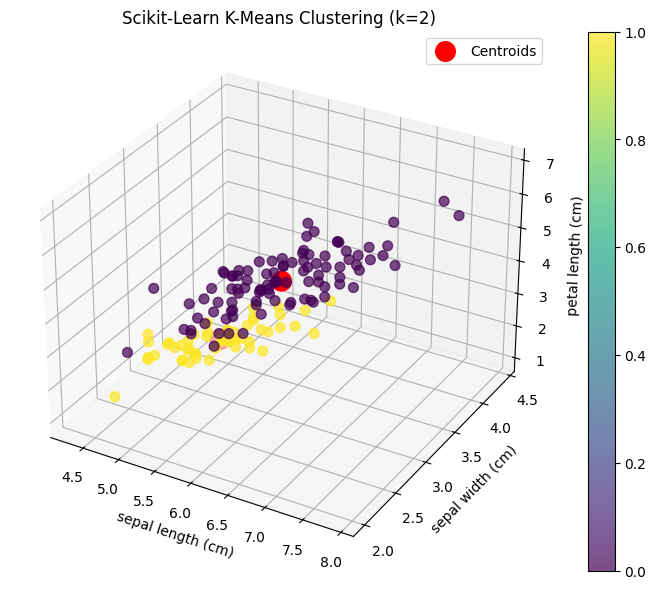

Adjusted Rand Index (Custom vs Scikit): 1.00
Number of clusters: 3


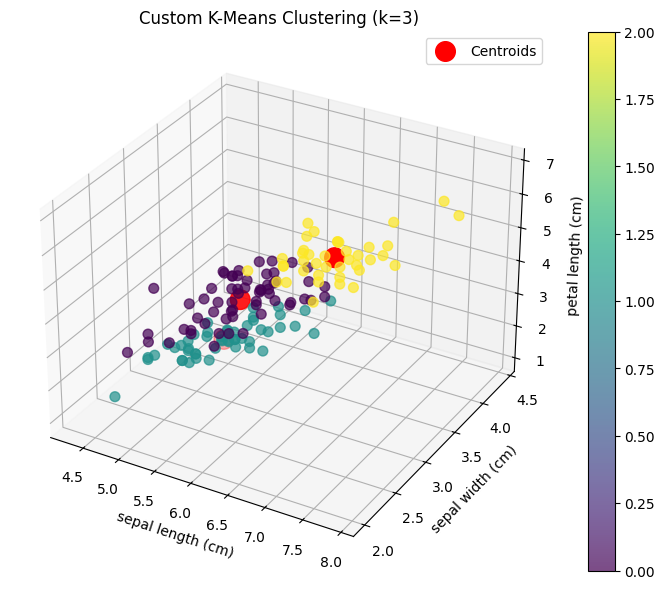

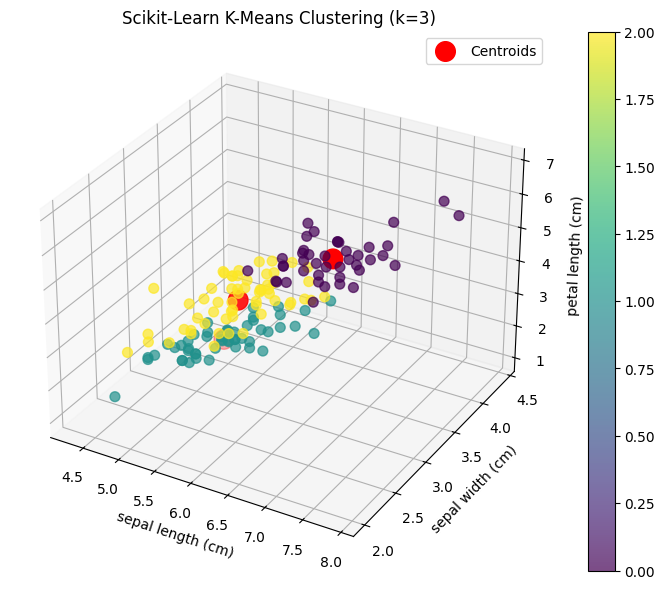

Adjusted Rand Index (Custom vs Scikit): 0.96
Number of clusters: 4


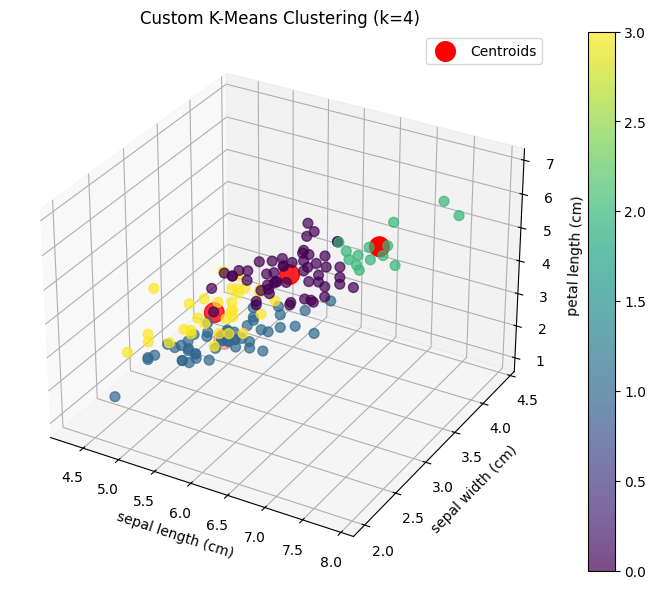

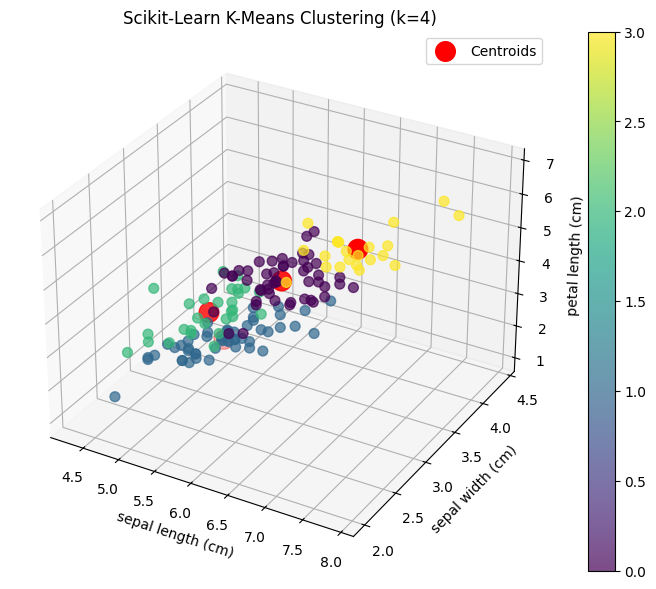

Adjusted Rand Index (Custom vs Scikit): 0.83


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
iris = load_iris()
data = iris.data[:, :3]  # Use first three features for clustering
true_labels = iris.target

# Custom k-means algorithm
def custom_kmeans(X, n_clusters, max_iter=300, tol=1e-4):
    np.random.seed(42)  # For reproducibility
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]  # Initialize centroids
    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

# Visualize 3D scatter plot
def plot_clusters_3d(X, labels, title, centroids=None):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50, alpha=0.7)
    if centroids is not None:
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, label='Centroids')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_zlabel(iris.feature_names[2])
    ax.set_title(title)
    plt.legend()
    plt.colorbar(scatter)
    plt.show()

# Experiment with number of clusters
n_clusters_list = [2, 3, 4]
for n_clusters in n_clusters_list:
    print(f"Number of clusters: {n_clusters}")

    # Custom k-means clustering
    custom_labels, custom_centroids = custom_kmeans(data, n_clusters)
    plot_clusters_3d(data, custom_labels, f"Custom K-Means Clustering (k={n_clusters})", custom_centroids)

    # Scikit-learn k-means clustering
    sklearn_kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
    sklearn_labels = sklearn_kmeans.labels_
    plot_clusters_3d(data, sklearn_labels, f"Scikit-Learn K-Means Clustering (k={n_clusters})", sklearn_kmeans.cluster_centers_)

    # Compare the clustering results
    ari_score = adjusted_rand_score(custom_labels, sklearn_labels)
    print(f"Adjusted Rand Index (Custom vs Scikit): {ari_score:.2f}")


Placeholder

In [ ]:
print("placeholder")

placeholder
